<i>## Comments will be provided using this format. Key takeaway: groups are encouraged to change the formatting, but not the structure. Groups are also allowed to create additional notebooks - for instance, create one notebook for data exploration, and one notebook for each preprocessing-modelling-evaluation pipeline -, but must strive to keep an unified style across notebooks.</i>

#### NOVA IMS / BSc in Data Science / Text Mining 2024/2025
### <b>Group Project: "Solving the Hyderabadi Word Soup"</b>
#### Notebook `Notebook Title`

#### Group:
- `Group member #1`
- `(...)`
- `Group member #5`

#### <font color='#BFD72'>Table of Contents </font> <a class="anchor" id='toc'></a> 
- [1. Data Understanding](#P1)
- [2. Data Exploration with visualizations](#P2) 
    - [2.1 ------------](#P21)
    - [2.2 -------------](#P22)
    - [2.3 ------------------](#P23)
    - [2.4 -------------](#P24)
    - [2.5 -------------](#P25)

- [3. Sentiment Analysis (Information Requirement 3312)](#P3)
    - [3.1 Specific Data Preparation](#P31)
    - [3.2 Model Implementation](#P32)
    - [3.3 Model Evaluation](#P3n)
- [4. Multilabel Classification (Information Requirement 3311)](#P4)
    - [4.1 Specific Data Preparation](#P41)
    - [4.2 Model Implementation](#P42)
    - [4.3 Model Evaluation](#P43)
- [...]
- [N. Additional Tasks (Information Requirements 332n)](#Pn)
    - [N.1 Specific Data Preparation](#Pn1)
    - [N.2 Model Implementation](#Pn2)
    - [N.3 Model Evaluation](#Pn3)

<i>## Note that the notebook structure differs from the report: instead of following the CRISP-DM phases and then specifying the different problems inside the phases, the notebook is structured by problem, with the CRISP-DM phases being defined for each specific problem.

In [1]:
## All imports must be concentrated on a cell that immediately follow the table of contents
%load_ext autoreload
%autoreload 2
#!pip install nltk==3.7
import time
import pandas as pd
import numpy as np
from utils.pipeline_v1d import main_pipeline
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import os
from wordcloud import WordCloud
import re
import nltk
nltk.download("punkt")
from nltk.tokenize import PunktSentenceTokenizer
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import plotly.express as px
from tqdm import tqdm
from collections import Counter
from collections import defaultdict

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joaof\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\joaof\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Explanation of Imported Libraries

1. **time**
   - **Functions**: Provides various time-related functions.
   - **Usage**: Useful for measuring the time taken by different parts of the code, which can help in optimizing performance.

2. **pandas**
   - **Functions**: Offers data structures and data analysis tools, such as DataFrames.
   - **Usage**: Essential for data manipulation and analysis, allowing us to handle and preprocess large datasets efficiently.

3. **numpy**
   - **Functions**: Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions.
   - **Usage**: Useful for numerical operations and handling arrays, which are common in data preprocessing and feature extraction.

4. **utils.pipeline_v1d**
   - **Functions**: Contains the `main_pipeline` function.
   - **Usage**: Custom module for this project, encapsulating the main workflow or processing steps.

5. **sklearn.feature_extraction.text.CountVectorizer**
   - **Functions**: Converts a collection of text documents to a matrix of token counts.
   - **Usage**: Useful for converting text data into numerical data, which can then be used for machine learning models.

6. **seaborn**
   - **Functions**: Provides a high-level interface for drawing attractive statistical graphics.
   - **Usage**: Useful for data visualization, helping to understand the distribution and relationships in the data.

7. **matplotlib.pyplot**
   - **Functions**: A plotting library for creating static, animated, and interactive visualizations.
   - **Usage**: Essential for creating various types of plots and charts to visualize data and results.

8. **pickle**
   - **Functions**: Implements binary protocols for serializing and de-serializing a Python object structure.
   - **Usage**: Useful for saving and loading machine learning models or other data structures.

9. **sklearn.feature_extraction.text.TfidfVectorizer**
   - **Functions**: Converts a collection of raw documents to a matrix of TF-IDF features.
   - **Usage**: Useful for transforming text data into numerical data, emphasizing important words in the documents.

10. **os**
    - **Functions**: Provides a way of using operating system-dependent functionality like reading or writing to the file system.
    - **Usage**: Useful for file handling operations, such as reading data files or saving results.

11. **wordcloud**
    - **Functions**: Generates word clouds from text data.
    - **Usage**: Useful for visualizing the most frequent words in the text data.

12. **re**
    - **Functions**: Provides support for regular expressions.
    - **Usage**: Useful for text preprocessing tasks such as searching, splitting, or replacing text patterns.

13. **nltk**
    - **Functions**: A suite of libraries and programs for natural language processing.
    - **Usage**: Useful for various NLP tasks such as tokenization, stemming, and lemmatization.

14. **plotly.express**
    - **Functions**: Provides functions for creating interactive plots.
    - **Usage**: Useful for creating interactive visualizations that can be explored in more detail.

15. **tqdm**
    - **Functions**: Provides a fast, extensible progress bar for loops and other iterable tasks.
    - **Usage**: Useful for tracking the progress of long-running tasks.

16. **collections.Counter**
    - **Functions**: A dict subclass for counting hashable objects.
    - **Usage**: Useful for counting occurrences of elements in the text data.

17. **collections.defaultdict**
    - **Functions**: A dict subclass that calls a factory function to supply missing values.
    - **Usage**: Useful for creating dictionaries with default values, which can simplify certain coding tasks.

18. **... other / new libararies to be imported ...**

<font color='#BFD72F' size=5>1. Data Understanding</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

<i>## Use markdown cells to describe the purpose of the code cells that follow them.</i>

In [2]:
reviews = pd.read_csv("data_hyderabad/10k_reviews.csv")
restaurants = pd.read_csv("data_hyderabad/105_restaurants.csv")

In [3]:
reviews

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [4]:
print(reviews["Rating"].value_counts()) 
reviews[reviews["Rating"] == "Like"]

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


In [5]:
reviews.describe(include = "all")

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [7]:
restaurants

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [8]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [9]:
restaurants.describe(include="all")

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [10]:
# In this cell, we created a dictionary called dicti that maps restaurant names to their corresponding cuisines:
dicti = {}
for i in range(len(restaurants)):
    dicti[restaurants["Name"][i]] = restaurants["Cuisines"][i]

## Explanation:

If restaurants is a list of dictionaries like this:

```
restaurants = [
    {"Name": "Restaurant A", "Cuisines": "Italian"},
    {"Name": "Restaurant B", "Cuisines": "Chinese"},
              ]
```

After running the code, dicti will look like this:

``` 
{
    "Restaurant A": "Italian",
    "Restaurant B": "Chinese"
}

```  


## Possible improvement of code:

```
dicti = {}
for restaurant in restaurants:
    if "Name" in restaurant and "Cuisines" in restaurant:
        dicti[restaurant["Name"]] = restaurant["Cuisines"] 
```  

In [11]:
#Miguel revê estes comentários pq mudei o codigo para um dos teus possiveis improvements
# initialize a new column named "Cuisine" in the reviews DataFrame and sets all its values to None. 
# This is a common practice to prepare a column for future data insertion.
reviews["Cuisine"] = reviews["Restaurant"].map(dicti)
# The original code initializes a "Cuisine" column and populates it by looking up values in a dictionary based on the "Restaurant" column.

## Potential Improvements
#### Vectorized Operations:

The current approach uses a loop to assign values, which can be slow for large DataFrames. Pandas supports vectorized operations that are more efficient.
You can achieve the same result without a loop using the .map() function:


``` 
{

reviews["Cuisine"] = reviews["Restaurant"].map(dicti)

or

reviews["Cuisine"] = reviews["Restaurant"].map(dicti).fillna("Unknown")

}

``` 

In [12]:
reviews

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Cuisine
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,"Chinese, Continental, Kebab, European, South I..."
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,"Chinese, Continental, Kebab, European, South I..."
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,"Chinese, Continental, Kebab, European, South I..."
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,"Chinese, Continental, Kebab, European, South I..."
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,"Chinese, Continental, Kebab, European, South I..."
...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,"Chinese, Seafood"
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,"Chinese, Seafood"
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,"Chinese, Seafood"
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,"Chinese, Seafood"


In [13]:
print(reviews["Review"].sample(12))

2421    Well went to this place on a ladies night so d...
9394    We went on a weekend to this place as we had b...
6673                                                 good
4263    A cafe by the legendary Karachi Bakery,it live...
7819    The restaurant was quite big and maintained ve...
5813    Since i am not an ice cream lover, still i ord...
8887                                         Excellent!!!
1322    Good concept, based on some other existing clu...
7108    This place has a good ambiance and is a treat ...
1891    I have always loved the TDS chain. Been to Kol...
8575                   nice deliver boy by good behaviour
407     Service is amazing!!! Three cheese mushroom is...
Name: Review, dtype: object


In [14]:
print(reviews["Cuisine"].sample(12))

822     American, Chinese, North Indian, Kebab, South ...
4211                            Cafe, Desserts, Fast Food
910                                   Ice Cream, Desserts
2544                                          Continental
8437               North Indian, Andhra, Biryani, Chinese
6004          North Indian, Continental, Chinese, Italian
2730                North Indian, Mediterranean, European
3016                   Andhra, South Indian, North Indian
7709                Italian, North Indian, Chinese, Salad
2378                                  Ice Cream, Desserts
8017                          North Indian, Burger, Kebab
2972                                            Fast Food
Name: Cuisine, dtype: object


From the initial data exploration we concluded:
- There are missing values in a lot of columns which should be dealt with accordingly to the tasks 
- We joined the cuisines from the `restaurants` to the `reviews` dataset so that we have the column `Cuisines` merged in only one dataset
- After taking samples of the `Review`, it is a string of words, numbers and emojis and some other signs and punctuation
- After taking samples of the `Cuisine`, it is a of types of cuisines separated by comas
- The column `Rating` has one value "Like" instead of being a number from 1 to 5 like all the others
- The columns `Restaurant` and `Name` from `reviews` and `restaurants` respectively consist in a string with the name of the restaurant
- The column `Metadata` consists of a string with the number of followers and numbers of reviews
- The column `Time` consists of a string with the time and date the review was made
- The column `Pictures` consists of an integer that is the number of fotos uploaded along with the review
- The column `Reviewer` consists of a string with the name of the person who wrote the review
- The column `Cost` consists of integers representing the estimate cost of dining in the restaurant
- The column `Link` consists of a string with the link corresponding to the restaurant in Zomato's website
- The column  `Collections` consists of a string with of which Zomato's collection the restaurant belongs to
- The column `Timings` consists of a string with the hours and days of the week the restaurant is open

<font color='#BFD72F' size=5>2. Data exploration with visualizations</font> <a class="anchor" id="P2"></a>
  
[Back to TOC](#toc)


In [15]:
reviews_text_only = reviews.copy()
reviews_text_only.dropna(subset=['Review'], inplace= True) # remove all rows from the reviews DataFrame where the 'Review' column has missing (NaN) values:

# we are removing the columns that are irrelevant to the analysis:
reviews_text_only.drop(columns = ["Reviewer", "Time", "Pictures", "Metadata", "Rating"], inplace= True)
reviews_text_only

,Restaurant,Review,Cuisine
0,Beyond Flavours,"The ambience was good, food was quite good . h...","Chinese, Continental, Kebab, European, South I..."
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,"Chinese, Continental, Kebab, European, South I..."
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,"Chinese, Continental, Kebab, European, South I..."
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,"Chinese, Continental, Kebab, European, South I..."
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,"Chinese, Continental, Kebab, European, South I..."
...,...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,"Chinese, Seafood"
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,"Chinese, Seafood"
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...","Chinese, Seafood"
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,"Chinese, Seafood"


In [16]:
reviews_text_only["All_lower"] = reviews_text_only["Review"].apply(lambda x: x.lower())
reviews_text_only

,Restaurant,Review,Cuisine,All_lower
0,Beyond Flavours,"The ambience was good, food was quite good . h...","Chinese, Continental, Kebab, European, South I...","the ambience was good, food was quite good . h..."
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,"Chinese, Continental, Kebab, European, South I...",ambience is too good for a pleasant evening. s...
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,"Chinese, Continental, Kebab, European, South I...",a must try.. great food great ambience. thnx f...
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,"Chinese, Continental, Kebab, European, South I...",soumen das and arun was a great guy. only beca...
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,"Chinese, Continental, Kebab, European, South I...",food is good.we ordered kodi drumsticks and ba...
...,...,...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,"Chinese, Seafood",madhumathi mahajan well to start with nice cou...
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,"Chinese, Seafood",this place has never disappointed us.. the foo...
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...","Chinese, Seafood","bad rating is mainly because of ""chicken bone ..."
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,"Chinese, Seafood",i personally love and prefer chinese food. had...


In [17]:
n = np.random.randint(0,9555)
print(reviews_text_only.iloc[n]["Review"])
print(reviews_text_only.iloc[n]["All_lower"])

Went for a Sunday bruch and compared to other places of the same league the staff is definitely the most friendliest 😀, but the food options are the bottom most on my list. The food is good definitely, but for a Sunday brunch the options are extremely limited compared to what's being offered around. I am thankful to the staff for pulling together a cheese platter just to accompany my wine and for that I took them to 4 from my initial 3* . Sometimes the smiles and the courtesy make a lot of difference and might want me to visit again. The beverage (alcohol 😋) menu is very limited , does not match back to others - I hope they match it up. We had to separately order drinks as there was nothing on their selection that we drank !! 😋. And before I forget , their dessert bar is good !
went for a sunday bruch and compared to other places of the same league the staff is definitely the most friendliest 😀, but the food options are the bottom most on my list. the food is good definitely, but for a

<font color='#BFD72F' size=4>2.1 BOW plot for the reviews</font> <a class="anchor" id="P21"></a>
  
[Back to TOC](#toc)

In [18]:
def word_freq_calculator(td_matrix, word_list, df_output=True):
    #counts the number of times a word appears
    word_counts = np.sum(td_matrix, axis=0).tolist()
    if df_output == False:
        word_counts_dict = dict(zip(word_list, word_counts))
        return word_counts_dict
    else:
        word_counts_df = pd.DataFrame({"words":word_list, "frequency":word_counts})
        word_counts_df = word_counts_df.sort_values(by=["frequency"], ascending=False)
        return word_counts_df

In [19]:
#Create a BOW and get the number of times each word in the reviews appears
bow_vectorizer = CountVectorizer()
clean_bow_td_matrix = bow_vectorizer.fit_transform(reviews_text_only["All_lower"]).toarray()
clean_bow_word_list = bow_vectorizer.get_feature_names_out().tolist()
clean_bow_words_freq = word_freq_calculator(clean_bow_td_matrix, clean_bow_word_list)
clean_bow_words_freq

,words,frequency
13504,the,23291
898,and,17638
14576,was,10320
13709,to,9905
6960,is,9253
...,...,...
8489,million,1
8486,millers,1
8485,millennials,1
8484,millennial,1


In [20]:
reviews_text_only["First_BOW"] = clean_bow_td_matrix.tolist()
reviews_text_only

,Restaurant,Review,Cuisine,All_lower,First_BOW
0,Beyond Flavours,"The ambience was good, food was quite good . h...","Chinese, Continental, Kebab, European, South I...","the ambience was good, food was quite good . h...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,"Chinese, Continental, Kebab, European, South I...",ambience is too good for a pleasant evening. s...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,"Chinese, Continental, Kebab, European, South I...",a must try.. great food great ambience. thnx f...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,"Chinese, Continental, Kebab, European, South I...",soumen das and arun was a great guy. only beca...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,"Chinese, Continental, Kebab, European, South I...",food is good.we ordered kodi drumsticks and ba...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
9995,Chinese Pavilion,Madhumathi Mahajan Well to start with nice cou...,"Chinese, Seafood",madhumathi mahajan well to start with nice cou...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9996,Chinese Pavilion,This place has never disappointed us.. The foo...,"Chinese, Seafood",this place has never disappointed us.. the foo...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9997,Chinese Pavilion,"Bad rating is mainly because of ""Chicken Bone ...","Chinese, Seafood","bad rating is mainly because of ""chicken bone ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9998,Chinese Pavilion,I personally love and prefer Chinese Food. Had...,"Chinese, Seafood",i personally love and prefer chinese food. had...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [21]:
def plot_term_frequency(df,name, nr_terms, df_name, show=True):
    
    # Create the Seaborn bar plot
    plt.figure(figsize=(10, 8))
    sns_plot = sns.barplot(x='frequency', y='words', data=df.head(nr_terms))  # Plotting top 20 terms for better visualization
    plt.title('Top 20 Term Frequencies of {}'.format(df_name))
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    if show:
        plt.show()

    fig = sns_plot.get_figure()
    plt.savefig(f'graphs/{name}.png', dpi=300, bbox_inches='tight')

    return fig

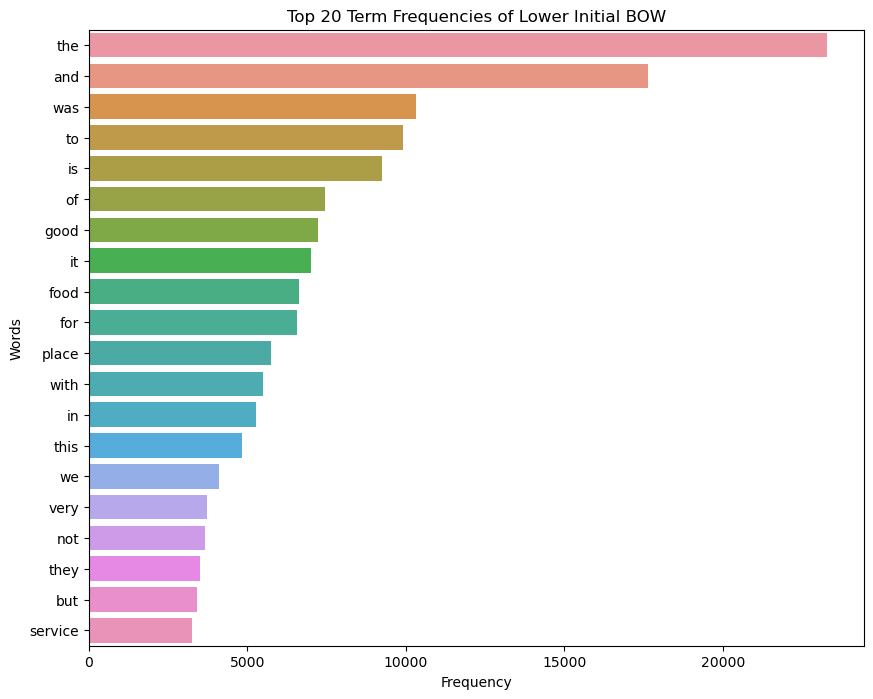

In [22]:
graph_clean_freq = plot_term_frequency(clean_bow_words_freq, name = "20_most_commun_words_initial", nr_terms=20, df_name = "Lower Initial BOW", show = False)

<font color='#BFD72F' size=4>2.2 Word cloud of reviews</font> <a class="anchor" id="P22"></a>
  
[Back to TOC](#toc)

In [23]:
def word_cloud_generator(folder_path, wc):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    ##Bow visualization
    chapter_bow_df = word_freq_calculator(clean_bow_td_matrix, clean_bow_word_list, df_output=False)
    wc.generate_from_frequencies(chapter_bow_df) ##Use color_func in word cloud?
    wc.to_file(os.path.join(folder_path, "First_BOW.png"))

In [24]:
wc = WordCloud(background_color="white",max_words=120, width = 220,height = 220, color_func=lambda *args, **kwargs: (0,0,0))
word_cloud_generator("graphs", wc)


<font color='#BFD72F' size=4>2.3 BOW treemap for the reviews</font> <a class="anchor" id="P23"></a>
  
[Back to TOC](#toc)

In [64]:
def get_pos_tag(word):
    tag = nltk.tag.pos_tag([word])[0][1]
    return tag

In [65]:
clean_bow_words_freq["pos_tag"] = clean_bow_words_freq["words"].apply(get_pos_tag)

#create a tree map
fig = px.treemap(clean_bow_words_freq[:350], 
                path=[px.Constant('Reviews'), 'pos_tag','words'], 
                values='frequency',
                color='frequency',
                color_continuous_scale='viridis',
                )

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

<font color='#BFD72F' size=4>2.4 BOW plot for the cuisine types</font> <a class="anchor" id="P24"></a>
  
[Back to TOC](#toc)

In [27]:
#Create a BOW and get the number of times each type of cuisine appears
bow_vectorizer = CountVectorizer(ngram_range=(1,2))
cuisine_td_matrix = bow_vectorizer.fit_transform(reviews_text_only["Cuisine"]).toarray()
cuisine_word_list = bow_vectorizer.get_feature_names_out().tolist()
cuisine_words_freq = word_freq_calculator(cuisine_td_matrix, cuisine_word_list)
cuisine_words_freq

,words,frequency
101,indian,7095
150,north,6095
152,north indian,5995
42,chinese,4095
106,indian chinese,2495
...,...,...
60,continental biryani,99
153,pizza,99
155,salad burger,77
91,food salad,77


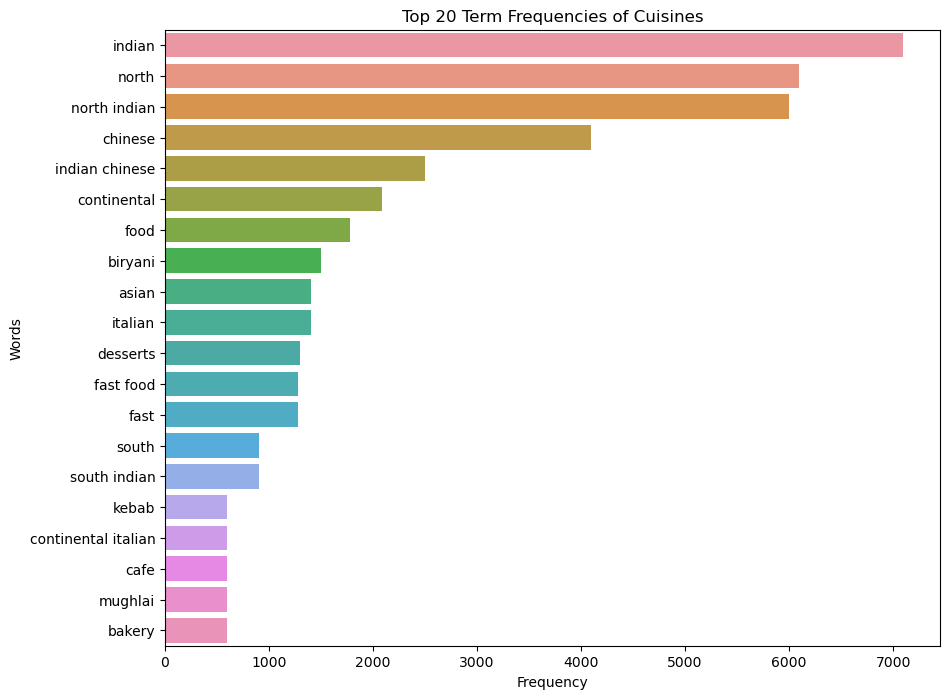

In [28]:
graph_clean_freq = plot_term_frequency(cuisine_words_freq, "20_most_commun_cuisine_types", 20, "Cuisines", show = False, )

<font color='#BFD72F' size=4>2.5 Co-occurrence in `Cuisines` visualization</font> <a class="anchor" id="P25"></a>
  
[Back to TOC](#toc)

In [29]:
def cooccurrence_matrix_window_generator(preproc_sentences, window_size):

    co_occurrences = defaultdict(Counter)

    # Compute co-occurrences
    for sentence in tqdm(preproc_sentences):
        for i, word in enumerate(sentence):
            for j in range(max(0, i - window_size), min(len(sentence), i + window_size + 1)):
                if i != j:
                    co_occurrences[word][sentence[j]] += 1

    #ensure that words are unique
    unique_words = list(set([word for sentence in preproc_sentences for word in sentence]))

    # Initialize the co-occurrence matrix
    co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

    # Populate the co-occurrence matrix
    word_index = {word: idx for idx, word in enumerate(unique_words)}
    for word, neighbors in co_occurrences.items():
        for neighbor, count in neighbors.items():
            co_matrix[word_index[word]][word_index[neighbor]] = count

    # Create a DataFrame for better readability
    co_matrix_df = pd.DataFrame(co_matrix, index=unique_words, columns=unique_words)

    co_matrix_df = co_matrix_df.reindex(co_matrix_df.sum().sort_values(ascending=False).index, axis=1)
    co_matrix_df = co_matrix_df.reindex(co_matrix_df.sum().sort_values(ascending=False).index, axis=0)

    # Return the co-occurrence matrix
    return co_matrix_df

In [30]:
reviews_text_only["Cuisine_spit"] = reviews_text_only["Cuisine"].apply(lambda x: x.lower().split(", "))

In [31]:
print(reviews_text_only["Cuisine_spit"].sample(1))

9188    [north indian, italian, continental, asian]
Name: Cuisine_spit, dtype: object


In [32]:
cuisines_cooccurrence_window = cooccurrence_matrix_window_generator(reviews_text_only["Cuisine_spit"].tolist(),10)

100%|██████████| 9955/9955 [00:00<00:00, 263815.21it/s]


In [33]:
fig = px.imshow(cuisines_cooccurrence_window.iloc[:, :], color_continuous_scale='reds', 
                labels=dict(x="Words", y="Words", color="Count"),
                title="Co-occurrence matrix for the Cuisines (All co-occurring words)", 
                width=1200, height=1200)

fig.show()

From this data exploration we concluded:
- There are a lot of stop words in the `Reviews` with only 4 words in the top 20 most common words that are not stop words
- In the list of the 20 most common cuisine types it was used bigramns in order to capture some types that had two words foming them
such as `North Indian`, however this led to other common combinations also appearing in the graph, from this plot we can conclude that `North Indian`, `Chinese` and `Continental` are the most common types of cuisines
- `North Indian` and `Chinese` are by far the two cuisine types that appear together in restaurants


<font color='#BFD72F' size=5>3. Sentiment Analysis</font> <a class="anchor" id="P3"></a>
  
[Back to TOC](#toc)


In [45]:
reviews

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Cuisine
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,"Chinese, Continental, Kebab, European, South I..."
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,"Chinese, Continental, Kebab, European, South I..."
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,"Chinese, Continental, Kebab, European, South I..."
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,"Chinese, Continental, Kebab, European, South I..."
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,"Chinese, Continental, Kebab, European, South I..."
...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0,"Chinese, Seafood"
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,"Chinese, Seafood"
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,"Chinese, Seafood"
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0,"Chinese, Seafood"


In [46]:
sent_analysis = reviews.copy()
sent_analysis.drop(columns = ["Restaurant", "Reviewer", "Metadata", "Time", "Cuisine", "Pictures"], inplace = True)
sent_analysis.dropna(subset = "Review", inplace = True)
sent_analysis.isna().sum()

Review    0
Rating    0
dtype: int64

In [47]:
unknown_rating = sent_analysis.loc[sent_analysis["Rating"] == "Like"].copy()
unknown_rating

,Review,Rating
7601,One of the best pizzas to try. It served with ...,Like


In [48]:
sent_analysis["Rating"] = sent_analysis["Rating"].apply(lambda x: float(x) if x != "Like" else np.nan)
sent_analysis.dropna(inplace=True)

In [49]:
sent_analysis.describe()

,Rating
count,9954.000000
mean,3.600261
std,1.483573
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


- There were missing values in the `Reviews`column which were dropped
- The "Like" in `Rating` previously mentioned was removed from the dataset but stored in a new variable to later on try and see what the probable value of the rating is based on the model that works best
- The mean rating is 3.6

<font color='#BFD72F' size=4>3.1 Data Prepocessing</font> <a class="anchor" id="P31"></a>
  
[Back to TOC](#toc)

In [50]:
sent_tokenizer = PunktSentenceTokenizer()

In [51]:
sent_analysis["Review_prepared"] = sent_analysis["Review"].apply(lambda x: main_pipeline(x,
                                                                                    print_output=False,
                                                                                    no_stopwords=False,
                                                                                    lowercase=False,
                                                                                    lemmatized=False,
                                                                                    no_punctuation=False,
                                                                                    no_emojis = False
                                                                                    ))

In [52]:
unknown_rating["Review_prepared"] = unknown_rating["Review"].apply(lambda x: main_pipeline(x,
                                                                                    print_output=False,
                                                                                    no_stopwords=False,
                                                                                    lowercase=False,
                                                                                    lemmatized=False,
                                                                                    no_punctuation=False,
                                                                                    no_emojis = False
                                                                                    ))

In [53]:
sent_analysis["Review_prepared_sentences"] =\
      sent_analysis["Review"].map(lambda content : [main_pipeline(sentence,
                                                                                    print_output=False,
                                                                                    no_stopwords=False,
                                                                                    lowercase=False,
                                                                                    lemmatized=False,
                                                                                    no_punctuation=False,
                                                                                    no_emojis = False
                                                                                    ) for sentence in sent_tokenizer.tokenize(content)])

In [54]:
sent_analysis

,Review,Rating,Review_prepared,Review_prepared_sentences
0,"The ambience was good, food was quite good . h...",5.0,"The ambience was good, food was quite good . h...","[The ambience was good, food was quite good., ..."
1,Ambience is too good for a pleasant evening. S...,5.0,Ambience is too good for a pleasant evening . ...,"[Ambience is too good for a pleasant evening.,..."
2,A must try.. great food great ambience. Thnx f...,5.0,A must try .. great food great ambience . Thnx...,"[A must try .. great food great ambience., Thn..."
3,Soumen das and Arun was a great guy. Only beca...,5.0,Soumen das and Arun was a great guy . Only bec...,"[Soumen das and Arun was a great guy., Only be..."
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,Food is ordered Kodi drumsticks and basket mut...,[Food is ordered Kodi drumsticks and basket mu...
...,...,...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3.0,Madhumathi Mahajan Well to start with nice cou...,[Madhumathi Mahajan Well to start with nice co...
9996,This place has never disappointed us.. The foo...,4.5,This place has never disappointed us .. The fo...,[This place has never disappointed us .. The f...
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"Bad rating is mainly because of ""Chicken Bone ...","[Bad rating is mainly because of ""Chicken Bone..."
9998,I personally love and prefer Chinese Food. Had...,4.0,I personally love and prefer Chinese Food . Ha...,"[I personally love and prefer Chinese Food., H..."


<font color='#BFD72F' size=4>3.2 Model Implemetation - Vader</font> <a class="anchor" id="P32"></a>
  
[Back to TOC](#toc)

In [55]:
vader = SentimentIntensityAnalyzer()

In [56]:
def vader_wrapper(user_review):    
    if type(user_review) == list:
        sent_compound_list = []
        for sentence in user_review:
            sent_compound_list.append(vader.polarity_scores(sentence)["compound"])
        polarity = np.array(sent_compound_list).mean()
    else:
        polarity = vader.polarity_scores(user_review)["compound"]
    return polarity

In [68]:
sent_analysis["Review_polarity_vader"] = sent_analysis["Review_prepared"].map(lambda review: vader_wrapper(review))
sent_analysis["Review_sentences_mean_polarity_vader"] = sent_analysis["Review_prepared_sentences"].map(lambda review: vader_wrapper(review))

In [58]:
sent_analysis.sample(5)

,Review,Rating,Review_prepared,Review_prepared_sentences,Review_polarity_vader,Review_sentences_mean_polarity_vader
4379,right on time,5.0,right on time,[right on time],0.0000,0.000000
3223,Decent place with good ambience specially the ...,4.0,Decent place with good ambience specially the ...,[Decent place with good ambience specially the...,0.9349,0.777900
3723,THEY SERVE WITH HOT AND YOU CAN ORDER SPICY OR...,4.0,THEY SERVE WITH HOT AND YOU CAN ORDER SPICY OR...,[THEY SERVE WITH HOT AND YOU CAN ORDER SPICY O...,0.2577,0.038600
5793,Not so good..,2.0,Not so good ..,[Not so good ..],-0.3865,-0.386500
5512,My all time favorite for bakery items and pizz...,5.0,My all time favorite for bakery items and pizz...,[My all time favorite for bakery items and piz...,0.5337,0.143175


<font color='#BFD72F' size=4>3.3 Model Evaluation - Vader</font> <a class="anchor" id="P33"></a>
  
[Back to TOC](#toc)

In [59]:
pearson_r, p_value = pearsonr(sent_analysis["Review_sentences_mean_polarity_vader"],sent_analysis["Review_polarity_vader"])
pearson_r

0.8210013150174684

In [60]:
pearson_r, p_value = pearsonr(sent_analysis["Review_sentences_mean_polarity_vader"],sent_analysis["Rating"])
pearson_r

0.6983362875728562

In [61]:
pearson_r, p_value = pearsonr(sent_analysis["Review_polarity_vader"],sent_analysis["Rating"])
pearson_r

0.705935929965607

Vader conclusions:
- Theres a high correlation between separating the reviews into sentences or not which mean that they are given almost the same information
- The correlation between the values obtained when doing the sentiment analysis separating reviews in sentences is slightly lower than when reviews are treated as whole (0.698 < 0.706)
- With this we conclude that the best version of the Vader is the one that does not separate the reviews into sentences


<font color='#BFD72F' size=4>3.4 Model Implemetation - TextBlob</font> <a class="anchor" id="P34"></a>
  
[Back to TOC](#toc)

In [62]:
def textblob_wrapper(user_review):   
    if type(user_review) == list:
        sent_compound_list = []
        for sentence in user_review:
            sent_compound_list.append(TextBlob(sentence).sentiment.polarity)
        polarity = np.array(sent_compound_list).mean()
    else:
        polarity = TextBlob(user_review).sentiment.polarity
    return polarity

In [69]:
sent_analysis["Review_polarity_textblob"] = sent_analysis["Review_prepared"].map(lambda review : textblob_wrapper(review))
sent_analysis["Review_sentences_mean_polarity_textblob"] = sent_analysis["Review_prepared_sentences"].map(lambda review : textblob_wrapper(review))

In [70]:
sent_analysis.sample(5)

,Review,Rating,Review_prepared,Review_prepared_sentences,Review_polarity_vader,Review_sentences_mean_polarity_vader,Review_polarity_textblob,Review_sentences_mean_polarity_textblob
7728,"The quality of the food is bad. The noodles, s...",1.0,"The quality of the food is bad . The noodles, ...","[The quality of the food is bad., The noodles,...",-0.3818,-0.089175,-0.130000,-0.181250
9129,"I visited cascade with my relatives, but there...",5.0,"I visited cascade with my relatives, but there...","[I visited cascade with my relatives, but ther...",0.9953,0.554350,0.511905,0.535417
2777,Hello Govind. Your way of treating us is reall...,5.0,Hello Govind . Your way of treating us is real...,"[Hello Govind., Your way of treating us is rea...",0.9310,0.441025,0.475000,0.387500
8370,excellent,5.0,excellent,[excellent],0.5719,0.571900,1.000000,1.000000
8672,"Not as regular, No choco Sticks are there, not...",1.0,"Not as regular, No choco Sticks are there, not...","[Not as regular, No choco Sticks are there, no...",0.2057,0.205700,-0.125000,-0.125000


<font color='#BFD72F' size=4>3.4 Model Evaluation - TextBlob</font> <a class="anchor" id="P34"></a>
  
[Back to TOC](#toc)

In [72]:
pearson_r, p_value = pearsonr(sent_analysis["Review_sentences_mean_polarity_textblob"],sent_analysis["Review_polarity_textblob"])
pearson_r

0.9554386058038353

In [73]:
pearson_r, p_value = pearsonr(sent_analysis["Review_sentences_mean_polarity_textblob"],sent_analysis["Rating"])
pearson_r

0.6784612861491148

In [74]:
pearson_r, p_value = pearsonr(sent_analysis["Review_polarity_textblob"],sent_analysis["Rating"])
pearson_r

0.6946786704212993

TextBlob conclusions:
- Theres a very high correlation between separating the reviews into sentences or not which mean that they give pretty much the same information
- The correlation between the values obtained when doing the sentiment analysis separating reviews in sentences is slightly lower than when reviews are treated as whole (0.678 < 0.695)
- With this we conclude that the best version of the TextBlob is the one that does not separate the reviews into sentences

<font color='#BFD72F' size=4>3.5 Model Evaluation - Vader vs TextBlob</font> <a class="anchor" id="P35"></a>
  
[Back to TOC](#toc)

In [75]:
pearson_r, p_value = pearsonr(sent_analysis["Review_polarity_textblob"],sent_analysis["Review_polarity_vader"])
pearson_r

0.6588012374782714

In [84]:
scaler = preprocessing.MinMaxScaler()
#The "reshape(-1,1)" is there to make sure that the column is fed as a 2D (4915 x 1) array
normalized_score = scaler.fit_transform(sent_analysis["Rating"].to_numpy().reshape(-1, 1))
normalized_polarity_vader = scaler.fit_transform(sent_analysis["Review_polarity_vader"].to_numpy().reshape(-1, 1))
normalized_polarity_textblob = scaler.fit_transform(sent_analysis["Review_polarity_textblob"].to_numpy().reshape(-1, 1))
normalized_polarity_vader_sent = scaler.fit_transform(sent_analysis["Review_sentences_mean_polarity_vader"].to_numpy().reshape(-1, 1))
normalized_polarity_textblob_sent = scaler.fit_transform(sent_analysis["Review_sentences_mean_polarity_textblob"].to_numpy().reshape(-1, 1))

In [85]:
rmse = mean_squared_error(normalized_score.reshape(-1), normalized_polarity_vader.reshape(-1), squared=False)
mape = mean_absolute_percentage_error(normalized_score.reshape(-1), normalized_polarity_vader.reshape(-1))
print("Vader: RMSE: {}; MAPE: {}".format(round(rmse, 3), round(mape, 3)))

Texblob: RMSE: 0.278; MAPE: 261981172176405.2


In [90]:
rmse = mean_squared_error(normalized_score.reshape(-1), normalized_polarity_vader_sent.reshape(-1), squared=False)
mape = mean_absolute_percentage_error(normalized_score.reshape(-1), normalized_polarity_vader_sent.reshape(-1))
print("Vader diveded into sentences: RMSE: {}; MAPE: {}".format(round(rmse, 3), round(mape, 3)))

Vader diveded into sentences: RMSE: 0.275; MAPE: 314160828752742.2


In [87]:
rmse = mean_squared_error(normalized_score.reshape(-1), normalized_polarity_textblob.reshape(-1), squared=False)
mape = mean_absolute_percentage_error(normalized_score.reshape(-1), normalized_polarity_textblob.reshape(-1))
print("Texblob: RMSE: {}; MAPE: {}".format(round(rmse, 3), round(mape, 3)))

Texblob diveded into sentences: RMSE: 0.278; MAPE: 312611745031681.0


In [89]:
rmse = mean_squared_error(normalized_score.reshape(-1), normalized_polarity_textblob_sent.reshape(-1), squared=False)
mape = mean_absolute_percentage_error(normalized_score.reshape(-1), normalized_polarity_textblob_sent.reshape(-1))
print("Textblob diveded into sentences: RMSE: {}; MAPE: {}".format(round(rmse, 3), round(mape, 3)))

Textblob: RMSE: 0.287; MAPE: 323722975947467.5


Final conclusions:
- The RMSE is almost identical in all the models, only varying from 0.275 to 0.287, the Vader model when the reviews separated by sentences is the other that has a lower error
- The MAPE is better in the Vader model that doesn't separate with value 261981172176405.2 which is much lower than the second best one that is the TextBlob model with value 312611745031681.0
- Overall we think that the model that performed the best was the Vader that does not separate the reviews into sentences